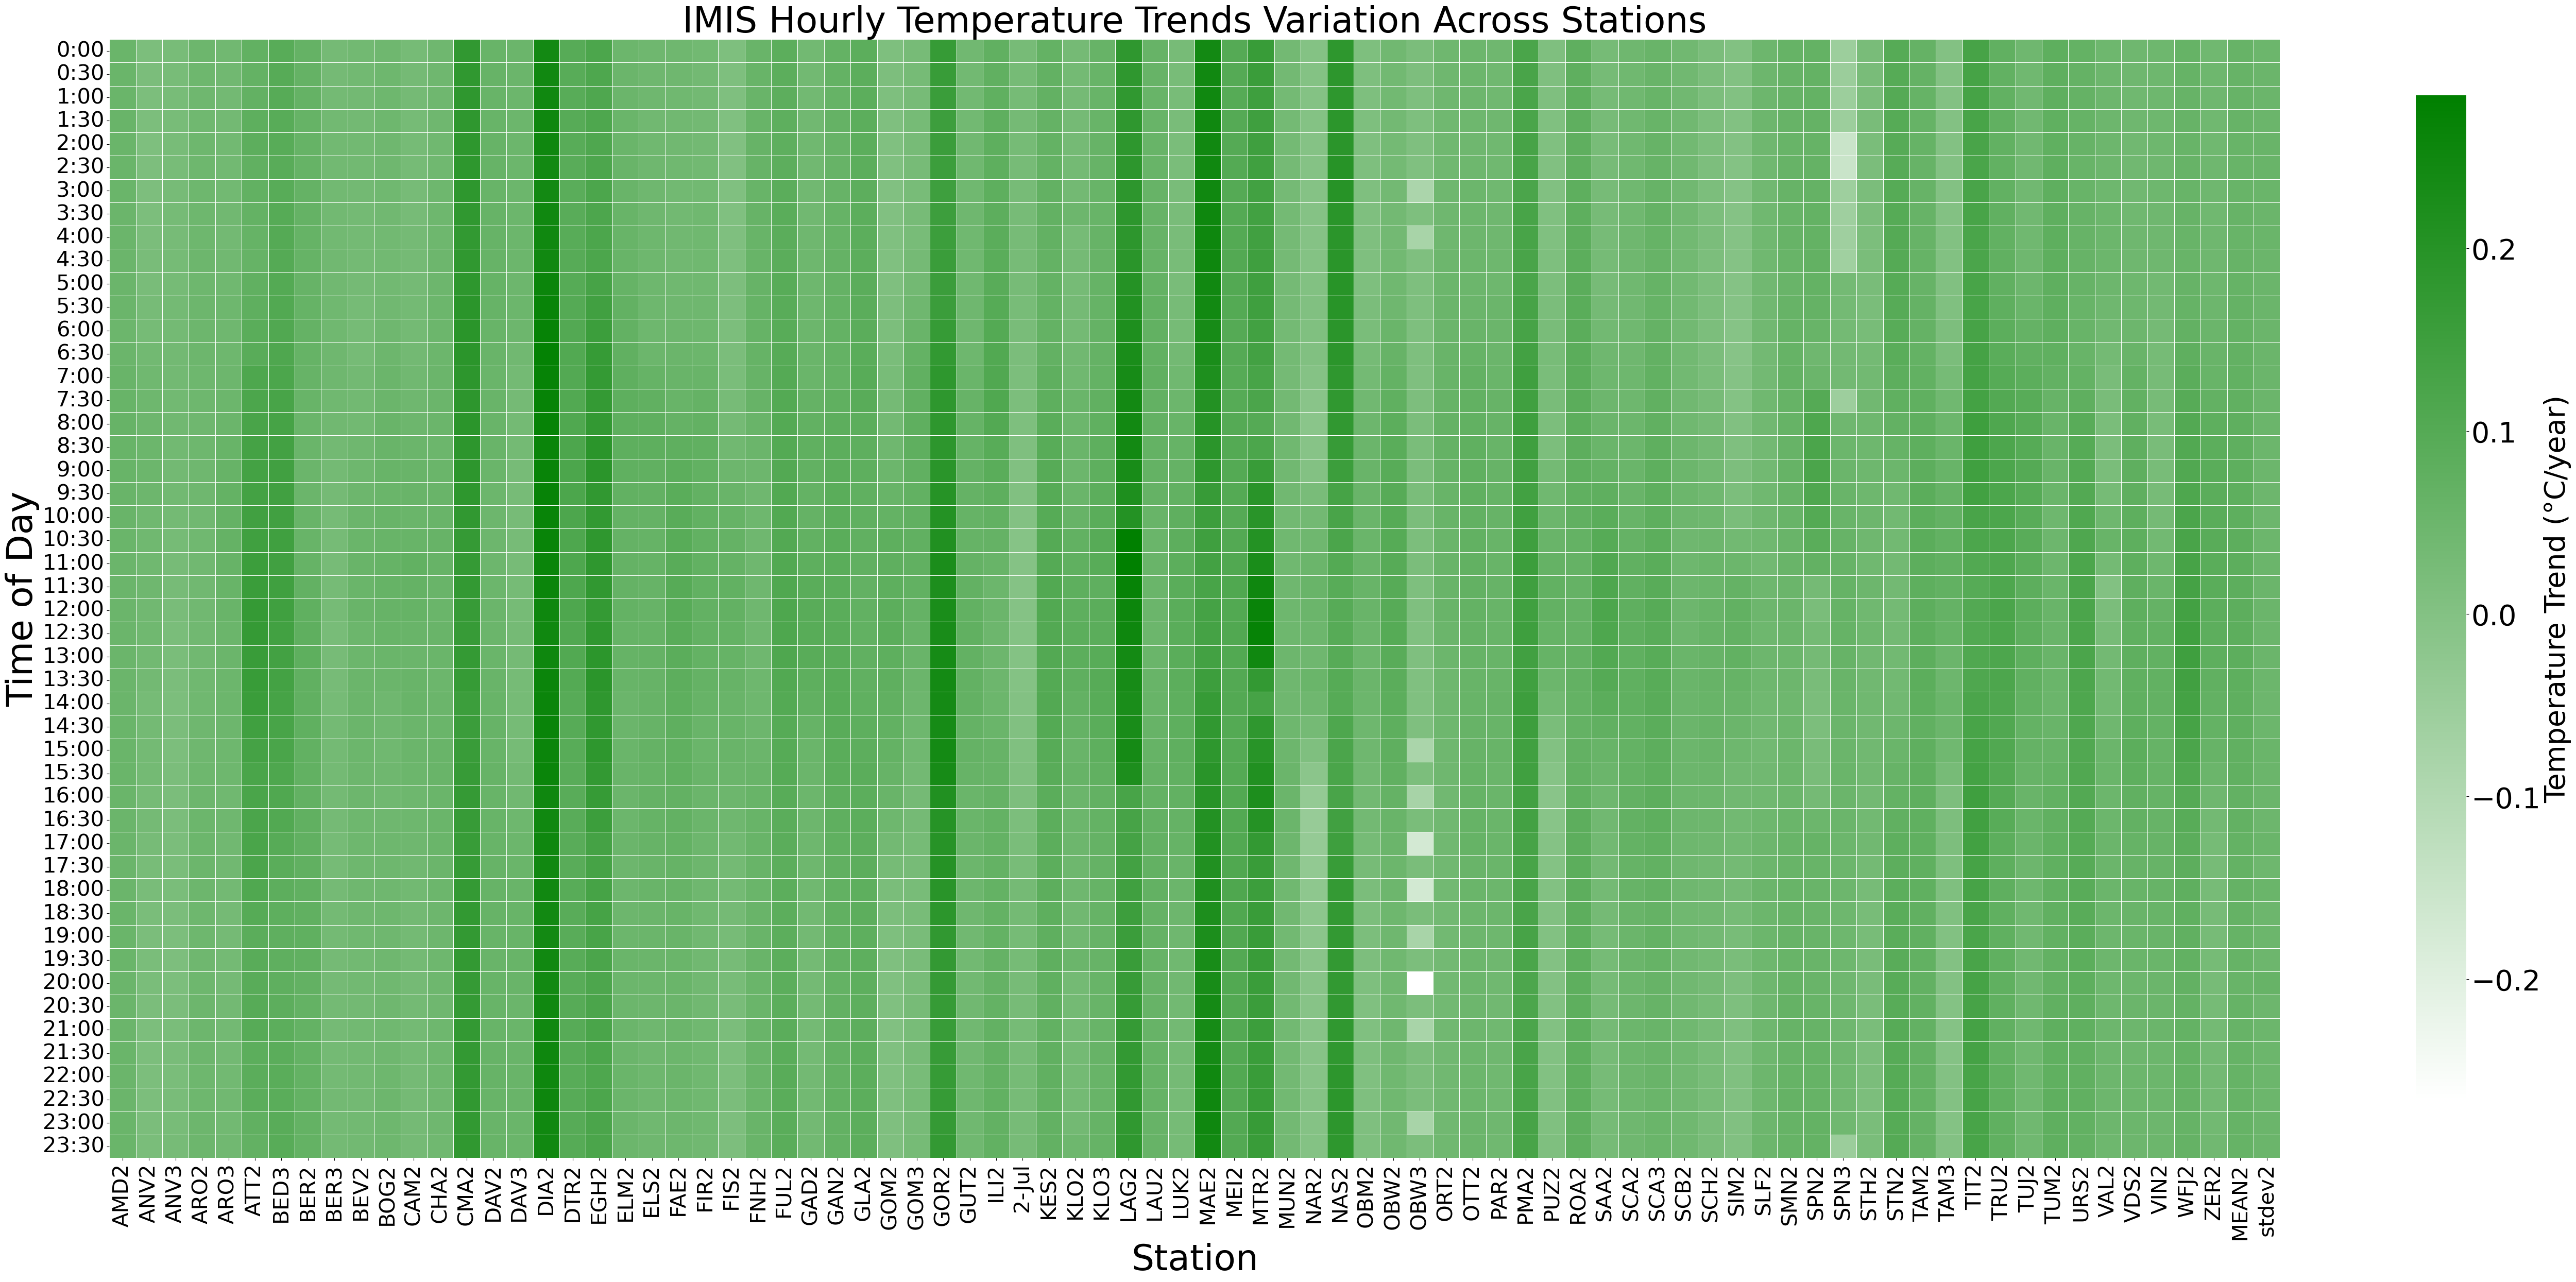

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the results from the CSV file
file_path = r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv"
results_df = pd.read_csv(file_path, index_col='Time')


# Create a custom colormap from white to green
cmap = mcolors.LinearSegmentedColormap.from_list("GreenWhite", ["white", "green"])

# Create a heatmap using seaborn
plt.figure(figsize=(55, 25))
heatmap = sns.heatmap(
    results_df.T, cmap=cmap, annot=False,
    cbar_kws={'label': 'Temperature Trend (°C/year)', 'shrink': 0.9},
    linewidths=0.5
)

# Set color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=40)  # Increase color bar tick label size
colorbar.set_label('Temperature Trend (°C/year)', fontsize=40)  # Increase color bar label size

# Set labels and title
plt.xlabel('Station', fontsize=50)  # Increase the size of the x-axis label
plt.ylabel('Time of Day', fontsize=50)       # Increase the size of the y-axis label
plt.title('IMIS Hourly Temperature Trends Variation Across Stations', fontsize=50)  # Increase title size

# Adjust tick label sizes
plt.xticks(rotation=90, fontsize=30)     # Increase x-axis tick label size
plt.yticks(rotation=360, fontsize=30)                   # Increase y-axis tick label size

# Display the heatmap
plt.tight_layout()
plt.show()


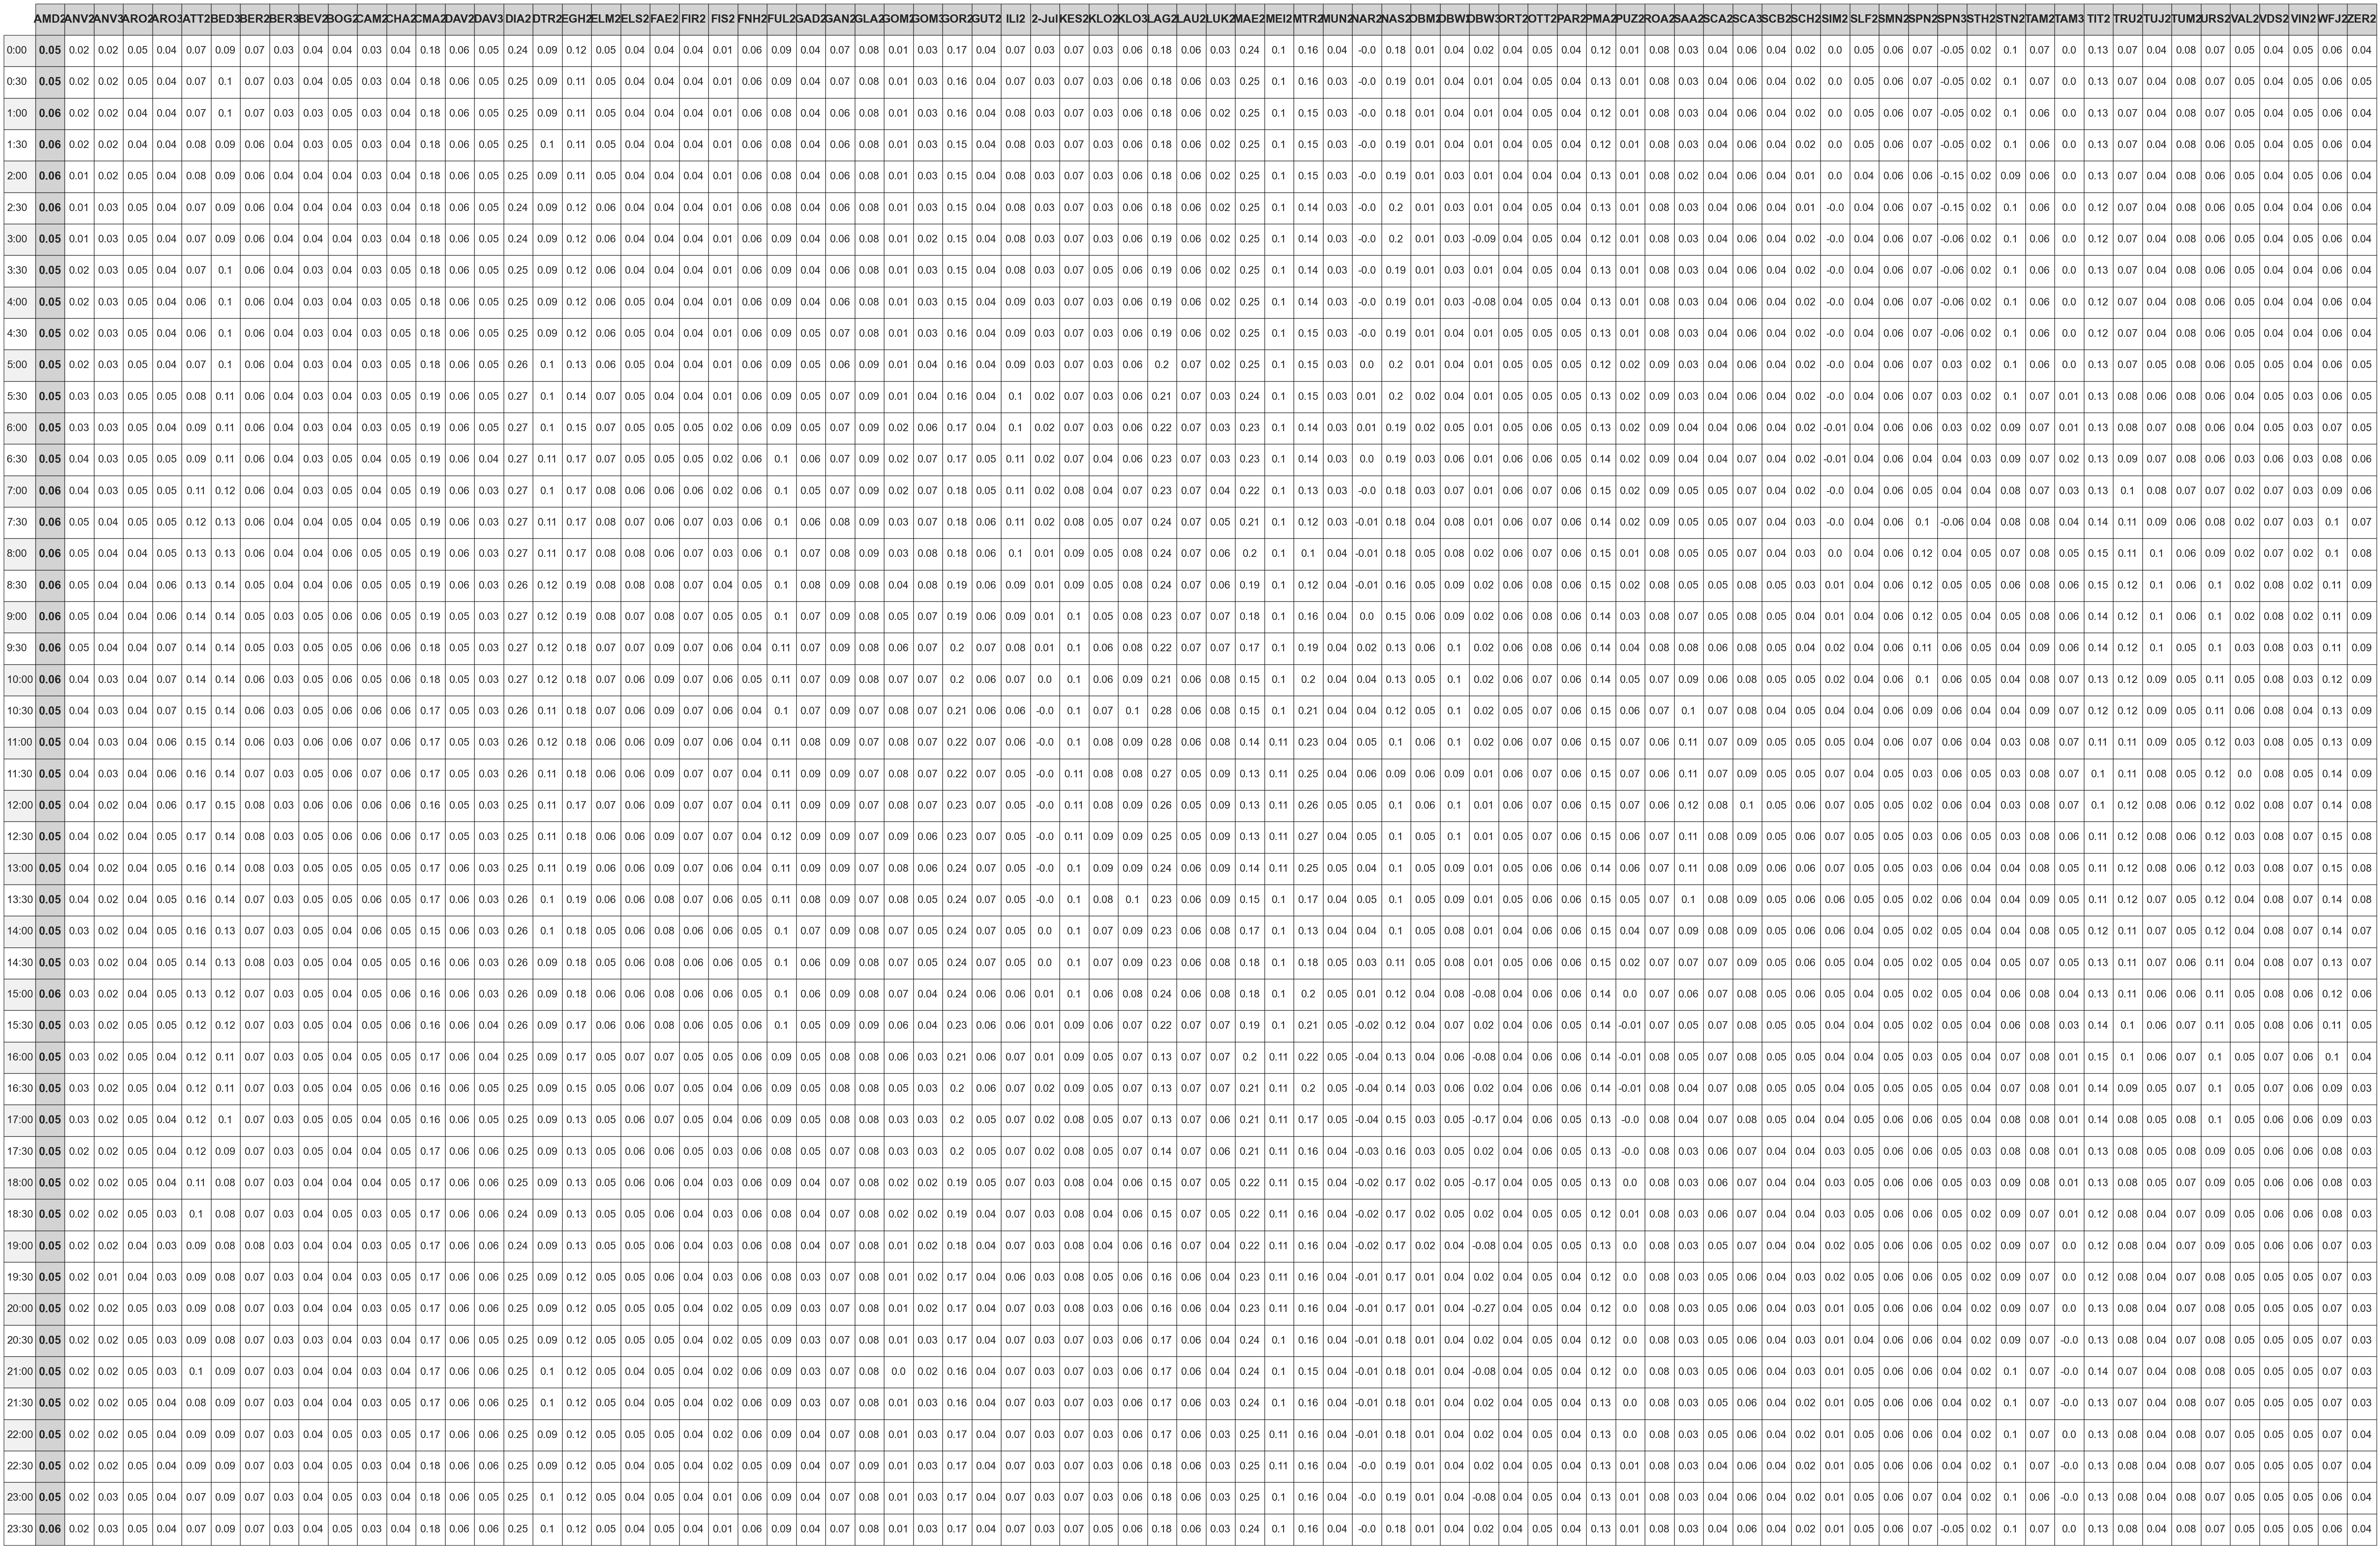

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from the CSV file
file_path = r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv"
results_df = pd.read_csv(file_path, index_col='Time')

# Exclude the last two rows
results_df = results_df.iloc[:-2]
# Transpose the dataframe so that stations become rows and times become columns
transposed_df = results_df.T.round(2)

# Create a figure and axis with an even larger size for better visibility
fig, ax = plt.subplots(figsize=(50, 20))  # Large figure size

# Remove axis
ax.axis('tight')
ax.axis('off')

# Set a color palette
sns.set(style="whitegrid")
col_colors = ["#f7f7f7"] * len(transposed_df.columns)  # Light gray for column headers
row_colors = ['#f1f1f1' if i % 2 == 0 else 'white' for i in range(len(transposed_df))]  # Alternating row colors

# Plot the table with a designed look
table = ax.table(cellText=transposed_df.values,
                colLabels=transposed_df.columns,
                rowLabels=transposed_df.index,
                cellLoc='center',
                loc='center',
                colColours=col_colors,
                rowColours=row_colors,
                colWidths=[0.1] * transposed_df.shape[1])

# Customize font properties for readability
table.auto_set_font_size(False)
table.set_fontsize(20)  # Increase font size for better visibility
table.scale(0.2, 5)  # Increase table scaling for better spacing

# Bold the column and row labels
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(22)  # Larger font for header
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d3d3d3')  # Light gray background for headers
    elif j == 0:
        cell.set_fontsize(22)  # Larger font for row labels
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d3d3d3')  # Light gray for row labels

# Save the table to a specific location (e.g., "E:/path/to/folder/table_image.png")
# Save the transposed dataframe to CSV
transposed_df.to_csv(r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\transposed_table.csv')

# Show the table
plt.show()
